In [ ]:
IBM Data Science Professional Certificate

In [ ]:
Applied Data Science Capstone - Coursera

# A Caribbean Restaurant in Montreal

In [ ]:
By Samson JULES, jul

As a part of the final IBM Capstone Project, we work on the real dataset to get an exprencies of what a data scientists go through in real life. Objectives of the final assignments were to define a business problem, look for data in the web and, use Foursquare location data to compare different neighborhoods of Montreal to figure out which neighborhood is suitable for starting a new restaurant business. In this project, I go through all the process in a step by step manner from problem designing, data preparation to final analysis and finally will provide a conclusion that can be leveraged by the business stakeholders to make their decisions.

## 1. Introduction

### 1.1. Business Problem 

Montreal is one of the major cities in Canada and Quebec in particular. Its population is the second largest French-speaking population in the world after France, composed largely of immigrants. One of the most immigrant-friendly cities in North America with more than half of the entire Haitian Canadian population residing in Montreal it is one of the best places to start an Caribbean restaurant.

In this project we will go through step by step process to make a decision whether it is a good idea to open an Caribbean restaurant. We analyze the neighborhoods in Montreal to identify the most profitable area since the success of the restaurant depends on the people, environment, ambience and other. Since we already know that Montreal shelter a greater number of Haitian than any other city in Canada, it is a good idea to start the restaurant here, but we just need to make sure whether it is a profitable idea or not. If so, where we can place it, so it yields more profit to the owner.

### 1.2. Interest or Target audience

Who will be more interested in this project? What type of clients or a group of people would be benefitted?
1.	Business personnel who wants to invest or open an Caribbean restaurant in Montreal. This analysis will be a comprehensive guide to start or expand restaurants targeting the Caribbean crowd.
2.	Freelancer who loves to have their own restaurant as a side business. This analysis will give an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.
3.	Haitian or Caribbean crowd who wants to find neighborhoods with lots of option for Caribbean restaurants. 
4.	Business Analyst or Data Scientists, who wish to analyze the neighborhoods of Montreal using Exploratory Data Analysis and other statistical & machine learning techniques to obtain all the necessary data, perform some operations on it and, finally be able to tell a story out of it.

## 2. Data acquisition and cleaning

### 2.1. Data acquisition

A. We use the "Open Data" data on http://donnees.ville.montreal.qc.ca/dataset/quartiers for data on the reference boroughs, neighbourhoods and cities of Montreal. For the geospatial coordinates of the neighbourhoods, we use the geolocator(geocoder). This data includes geospatial information (latitude and longitude). Neighbourhoods are reference neighbourhoods in housing.

B. The data on Montreal's immigrant population comes from the 2016 Census through the document entitled in French: "ANNUAIRE STATISTIQUE DE L'AGGLOMERATION DE MONTREAL / MONTREAL AGGLOMERATION STATISTICAL YEARBOOK". The document is available here: http://ville.montreal.qc.ca/portal/page?_pageid=6897,68087755&_dad=portal&_schema=PORTAL

C. To get location and other information about various venues in Montreal I’m using Foursquare’s explore API. Using the Foursquare’s explore API (which gives venues recommendations), I’m fetching details about the venues up present in Montreal and collected their names, categories and locations (latitude and longitude). 
From Foursquare API (https://developer.foursquare.com/docs), I retrieved the following for each venue:
<li>Name: The name of the venue. </li>
<li>Category: The category type as defined by the API.</li>
<li>Latitude: The latitude value of the venue.</li>
<li>Longitude: The longitude value of the venue.</li>

### 2.2. Cleaning the data

First, import some required librairies.

In [1]:
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Now we are ready to read the file containing the Borough and Neighborhoods name.

In [2]:
df3 = pd.read_csv('quartierreferencehabitation.csv')

In [3]:
df3

,no_qr,nom_qr,no_arr,nom_arr,nom_mun
0,53,Rivière-des-Prairies,33.0,Rivière-des-Prairies–Pointe-aux-Trembles,Montréal
1,24,Beaurivage,22.0,Mercier–Hochelaga-Maisonneuve,Montréal
2,23,Tétreaultville,22.0,Mercier–Hochelaga-Maisonneuve,Montréal
3,22,Dupéré,22.0,Mercier–Hochelaga-Maisonneuve,Montréal
4,25,Guybourg,22.0,Mercier–Hochelaga-Maisonneuve,Montréal
...,...,...,...,...,...
86,72,Pierrefonds-Est,31.0,Pierrefonds-Roxboro,Montréal
87,75,L'Île-Bizard–Sainte-Geneviève,32.0,L'Île-Bizard–Sainte-Geneviève,Montréal
88,70,Vieux-Lachine - Saint-Pierre,27.0,Lachine,Montréal
89,60A,Ouest,16.0,Montréal-Nord,Montréal


In [4]:
# Rename or translate some columns
new1 = df3.rename(columns={'nom_qr':'Neighborhood', 'nom_arr':'Borough'})
new1 = new1.drop(columns=['no_qr','no_arr'], axis=1)
new1['Borough'] = new1['Borough'].replace(np.nan, new1['nom_mun'])
new1

        

,Neighborhood,Borough,nom_mun
0,Rivière-des-Prairies,Rivière-des-Prairies–Pointe-aux-Trembles,Montréal
1,Beaurivage,Mercier–Hochelaga-Maisonneuve,Montréal
2,Tétreaultville,Mercier–Hochelaga-Maisonneuve,Montréal
3,Dupéré,Mercier–Hochelaga-Maisonneuve,Montréal
4,Guybourg,Mercier–Hochelaga-Maisonneuve,Montréal
...,...,...,...
86,Pierrefonds-Est,Pierrefonds-Roxboro,Montréal
87,L'Île-Bizard–Sainte-Geneviève,L'Île-Bizard–Sainte-Geneviève,Montréal
88,Vieux-Lachine - Saint-Pierre,Lachine,Montréal
89,Ouest,Montréal-Nord,Montréal


In [5]:
col_name = ['nom_mun','Latitude', 'Longitude']
col = pd.DataFrame(columns=col_name)
col['nom_mun']=new1['nom_mun']

In [6]:
# Concate the dataframes
c = pd.concat([new1, col])
c.head(20)

,Neighborhood,Borough,nom_mun,Latitude,Longitude
0,Rivière-des-Prairies,Rivière-des-Prairies–Pointe-aux-Trembles,Montréal,NaN,NaN
1,Beaurivage,Mercier–Hochelaga-Maisonneuve,Montréal,NaN,NaN
2,Tétreaultville,Mercier–Hochelaga-Maisonneuve,Montréal,NaN,NaN
3,Dupéré,Mercier–Hochelaga-Maisonneuve,Montréal,NaN,NaN
4,Guybourg,Mercier–Hochelaga-Maisonneuve,Montréal,NaN,NaN
5,Longue-Pointe,Mercier–Hochelaga-Maisonneuve,Montréal,NaN,NaN
6,Louis-Riel,Mercier–Hochelaga-Maisonneuve,Montréal,NaN,NaN
7,Marie-Victorin,Rosemont–La Petite-Patrie,Montréal,NaN,NaN
8,Maisonneuve,Mercier–Hochelaga-Maisonneuve,Montréal,NaN,NaN
9,René-Goupil,Villeray–Saint-Michel–Parc-Extension,Montréal,NaN,NaN


In [7]:
# Get the Latitude and longitude values of the Neighborhoods
geo = pd.read_csv('Geospatial_dataset_Mont.csv')
geo = geo.rename(columns={'nom_qr':'Neighborhood'})
geo

,Neighborhood,Latitude,Longitude
0,Rivière-des-Prairies,45.667964,-73.536857
1,Beaurivage,45.598013,-73.513942
2,Tétreaultville,45.601646,-73.524579
3,Dupéré,45.604441,-73.533697
4,Guybourg,45.573289,-73.521329
...,...,...,...
86,Pierrefonds-Est,45.509094,-73.809116
87,L'Île-Bizard–Sainte-Geneviève,45.495042,-73.903445
88,Vieux-Lachine - Saint-Pierre,45.445833,-73.650000
89,Ouest,45.587017,-73.643001


Finally, we have our dataframe

In [8]:
# Merging the dataframes to obtain our purchased dataframe
df_merged = pd.merge(new1, geo, on='Neighborhood')
df_merged

,Neighborhood,Borough,nom_mun,Latitude,Longitude
0,Rivière-des-Prairies,Rivière-des-Prairies–Pointe-aux-Trembles,Montréal,45.667964,-73.536857
1,Beaurivage,Mercier–Hochelaga-Maisonneuve,Montréal,45.598013,-73.513942
2,Tétreaultville,Mercier–Hochelaga-Maisonneuve,Montréal,45.601646,-73.524579
3,Dupéré,Mercier–Hochelaga-Maisonneuve,Montréal,45.604441,-73.533697
4,Guybourg,Mercier–Hochelaga-Maisonneuve,Montréal,45.573289,-73.521329
...,...,...,...,...,...
86,Pierrefonds-Est,Pierrefonds-Roxboro,Montréal,45.509094,-73.809116
87,L'Île-Bizard–Sainte-Geneviève,L'Île-Bizard–Sainte-Geneviève,Montréal,45.495042,-73.903445
88,Vieux-Lachine - Saint-Pierre,Lachine,Montréal,45.445833,-73.650000
89,Ouest,Montréal-Nord,Montréal,45.587017,-73.643001


Getting the immigrant population of Montreal by Borough. Because the neighborhoods immigrant population is unavailable in Open Data (Statistiques Montreal), we use the borough immigrant population.

In [9]:
pop_res = pd.read_excel("ANNUAIRE STATISTIQUE DE L'AGGLOMÉRATION DE MONTRÉAL_RECENSEMENT DE 2016_0.XLS", sheet_name="09C_ Statut d'immigrant")
pop_res = pop_res.rename(columns={"Population dans les ménages privés selon le statut d'immigrant":"Population in private households according to immigrant status", 
                                  "Unnamed: 1":"Population according to immigrant status", 
                                  "Unnamed: 2":"Immigrants", "Unnamed: 3":"% of Immigrants",
                                  "Unnamed: 4":"Non-immigrants", "Unnamed: 5":"% of Non-immigrants", 
                                  "Unnamed: 6":"Non-permanent residents", "Unnamed: 7":"% of Non-permanent residents"} )
pop_res = pop_res.drop(axis=0, index={0,1,39,40,41,42}).reset_index(drop=True)
pop_res.head()

,Population in private households according to immigrant status,Population according to immigrant status,Immigrants,% of Immigrants,Non-immigrants,% of Non-immigrants,Non-permanent residents,% of Non-permanent residents
0,AGGLOMÉRATION DE MONTRÉAL,1894995,644680,0.340201,1187255,0.626521,63055,0.0332745
1,Ville de Montréal,1663220,570940,0.343274,1033590,0.621439,58690,0.035287
2,Ahuntsic-Cartierville,128710,51940,0.403543,74505,0.578859,2265,0.0175977
3,Anjou,41715,13955,0.334532,27410,0.657078,350,0.00839027
4,Côte-des-Neiges–Notre-Dame-de-Grâce,163115,76215,0.467247,76495,0.468964,10405,0.0637894


In [10]:
# Rename some columns
pop_hai = pd.read_excel("ANNUAIRE STATISTIQUE DE L'AGGLOMÉRATION DE MONTRÉAL_RECENSEMENT DE 2016_0.XLS", sheet_name="09F_Imm Lieux de naissance")
pop_hai = pop_hai.rename(columns={"Population immigrante selon certains lieux de naissance":"Immigrant population according to certain birthplaces", 
                                  "Unnamed: 1":"Immigrants according to certain birthplaces", 
                                  "Unnamed: 2":"Haiti","Unnamed: 3":"% of immigrants from Haiti", 
                                  "Unnamed: 4":"Algeria", "Unnamed: 5":"% of immigrants from Algeria", 
                                  "Unnamed: 6":"Italy", "Unnamed: 7":"% of immigrants from Italy", 
                                  "Unnamed: 8":"France", "Unnamed: 9":"% of immigrants from France",
                                  "Unnamed: 10":"Morocco","Unnamed: 11":"% of immigrants from Morocco",
                                 "Unnamed: 12":"China","Unnamed: 13":"% of immigrants from China",
                                 "Unnamed: 14":"Philipines","Unnamed: 15":"% of immigrants from Philipines",
                                 "Unnamed: 16":"Lebanon","Unnamed: 17":"% of immigrants from Lebanon",
                                 "Unnamed: 18":"Vietnam","Unnamed: 19":"% of immigrants from Vietnam",
                                 "Unnamed: 20":"Romania","Unnamed: 21":"% of immigrants from Romania",
                                 })

pop_hai = pop_hai.drop(axis={0,1,2}, index={0,1,39,40,41,42}).reset_index(drop=True)
pop_hai = pop_hai.loc[0:36,'Immigrant population according to certain birthplaces':'% of immigrants from Romania']
pop_hai=pop_hai.drop([0,1,21,29], axis=0).reset_index(drop=True)
pop_hai

,Immigrant population according to certain birthplaces,Immigrants according to certain birthplaces,Haiti,% of immigrants from Haiti,Algeria,% of immigrants from Algeria,Italy,% of immigrants from Italy,France,% of immigrants from France,...,China,% of immigrants from China,Philipines,% of immigrants from Philipines,Lebanon,% of immigrants from Lebanon,Vietnam,% of immigrants from Vietnam,Romania,% of immigrants from Romania
0,Ahuntsic-Cartierville,51945,4310,0.0829724,4850,0.093368,3215,0.0618924,1820,0.0350371,...,1115,0.021465,255,0.00490904,3375,0.0649726,1340,0.0257965,1005,0.0193474
1,Anjou,13955,2470,0.176997,2890,0.207094,905,0.0648513,385,0.0275887,...,270,0.0193479,25,0.00179147,195,0.0139735,460,0.0329631,440,0.0315299
2,Côte-des-Neiges–Notre-Dame-de-Grâce,76220,1645,0.0215823,2130,0.0279454,1360,0.0178431,4155,0.0545133,...,4185,0.0549068,11445,0.150157,1225,0.0160719,1745,0.0228943,2780,0.0364734
3,Lachine,9580,265,0.0276618,255,0.026618,290,0.0302714,460,0.0480167,...,925,0.0965553,525,0.0548017,110,0.0114823,50,0.00521921,330,0.0344468
4,LaSalle,26940,440,0.0163326,1365,0.0506682,2500,0.0927988,405,0.0150334,...,2180,0.0809206,465,0.0172606,130,0.00482554,320,0.0118782,605,0.0224573
5,Le Plateau-Mont-Royal,24320,370,0.0152138,620,0.0254934,365,0.0150082,6730,0.276727,...,960,0.0394737,125,0.0051398,435,0.0178865,420,0.0172697,270,0.011102
6,Le Sud-Ouest,19185,365,0.0190253,790,0.041178,925,0.0482148,1570,0.0818348,...,2040,0.106333,290,0.015116,350,0.0182434,405,0.0211102,300,0.0156372
7,L'Île-Bizard–Sainte-Geneviève,4480,230,0.0513393,85,0.0189732,225,0.0502232,235,0.0524554,...,230,0.0513393,230,0.0513393,220,0.0491071,35,0.0078125,210,0.046875
8,Mercier–Hochelaga-Maisonneuve,27615,2400,0.0869093,3115,0.112801,1250,0.0452653,2660,0.0963245,...,1180,0.0427304,105,0.00380228,270,0.00977729,1170,0.0423683,510,0.0184682
9,Montréal-Nord,34005,11360,0.334069,3535,0.103955,3490,0.102632,465,0.0136745,...,240,0.00705779,80,0.0023526,1160,0.0341126,780,0.0229378,190,0.00558741


Get location data using Foursquare

In [11]:
#Use geopy library to get the latitude and longitude values of Montreal City.

address = 'Montreal, QC'

geolocator = Nominatim(user_agent="qc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Montreal are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Montreal are 45.4972159, -73.6103642.


In [12]:
CLIENT_ID = '' 
CLIENT_SECRET = '' 
VERSION = '20180605' # Foursquare API version

In [13]:
radius=1000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    latitude, 
    longitude, 
    VERSION, 
    radius)
results = requests.get(url).json()

In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Cleaning up the json and turn it into a pandas dataframe by using the get category type function. 


In [15]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Duc de Lorraine,Bakery,45.494618,-73.618279
1,Les Appartments Rockhill Inc,Residential Building (Apartment / Condo),45.495024,-73.614498
2,Belvédère Summit Circle,Scenic Lookout,45.491326,-73.604463
3,La Caverne,Russian Restaurant,45.495546,-73.620538
4,Parc Summit / Summit Park,Park,45.491478,-73.604490


Now, we can explore the nearby venues. First, we get them using the getNearbyVenues function

In [16]:
# Function to get the nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
LIMIT=200
montreal_venues = getNearbyVenues(names=df_merged['Neighborhood'],
                                   latitudes=df_merged['Latitude'],
                                   longitudes=df_merged['Longitude']
                                  )

Rivière-des-Prairies
Beaurivage
Tétreaultville
Dupéré
Guybourg
Longue-Pointe
Louis-Riel
Marie-Victorin
Maisonneuve
René-Goupil
Sainte-Lucie
Sault-au-Récollet
Saint-Sulpice
Nicolas-Viel
François-Perrault
Savane
Snowdon
Côte-Saint-Antoine
Ville-Émard
Saint-Henri
Côte-Saint-Paul
Pointe-Saint-Charles
Petite-Bourgogne
Montagne
René-Lévesque
Édouard-Montpetit
Parc-Kent
Hochelaga
Sainte-Marie
Préfontaine
Petite-Côte
Vieux-Rosemont
Étienne Desmarteaux
Louis-Hébert
Lorimier
Saint-Louis
Parc-Lafontaine
Parc-Laurier
Mile End
Gabriel-Sagard
Parc-Extension
Saint-Édouard
Parc-Jarry
Crémazie
Père-Marquette
Pointe-aux-Trembles
Marc-Aurèle-Fortin
Vieux-Montréal
Loyola
Upper Lachine
La Visitation
Nouveau-Bordeaux
Cartierville
Anjou
Outremont
Chameran/Montpellier
Grenet
Dutrisac
Bois-Francs
Est
Centre
Grande-Prairie
Port-Maurice
Desmarchais-Crawford
Verdun-Centre
Ile-des-Soeurs
Sault-Saint-Louis
Cecil-P.-Newman
Lachine-Ouest
Du College/Hodge
Milton-Parc
Pierrefonds-Ouest
Montréal-Est
Westmount
Hampstead


In [18]:
print(montreal_venues.shape)
montreal_venues.head()

(1174, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rivière-des-Prairies,45.667964,-73.536857,STM Arrêt #61273,45.665108,-73.535263,Bus Stop
1,Rivière-des-Prairies,45.667964,-73.536857,Toitures D L MAT,45.663916,-73.535549,Construction & Landscaping
2,Beaurivage,45.598013,-73.513942,Parc de la Promenade-Bellerive,45.595336,-73.509880,Park
3,Beaurivage,45.598013,-73.513942,Coronel Restaurant,45.599833,-73.512395,Diner
4,Beaurivage,45.598013,-73.513942,Metro Notre-Dame,45.594486,-73.511472,Supermarket


In [19]:
montreal_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Anjou,3,3,3,3,3,3
Baie-D'Urfé,4,4,4,4,4,4
Beaconsfield,4,4,4,4,4,4
Beaurivage,4,4,4,4,4,4
Bois-Francs,2,2,2,2,2,2
...,...,...,...,...,...,...
Vieux-Montréal,92,92,92,92,92,92
Vieux-Rosemont,34,34,34,34,34,34
Ville-Émard,10,10,10,10,10,10


In [20]:
print('There are {} uniques categories.'.format(len(montreal_venues['Venue Category'].unique())))

There are 211 uniques categories.


There are 211 unique categories in which Caribbean Restaurant is one of them. 


One hot encoding for getting dummies of venue category. So that we will calculate mean of all venue groupby there neighborhoods.

In [21]:
montreal_onehot = pd.get_dummies(montreal_venues[['Venue Category']], prefix="", prefix_sep="")

montreal_onehot['Neighborhood'] = montreal_venues['Neighborhood']

fixed_columns = [montreal_onehot.columns[-1]] + list(montreal_onehot.columns[:-1])
montreal_onehot = montreal_onehot[fixed_columns]
montreal_grouped = montreal_onehot.groupby('Neighborhood').mean().reset_index()
montreal_grouped

,Neighborhood,Yoga Studio,ATM,American Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,...,Toy / Game Store,Trail,Train,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,Anjou,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00000,0.00000
1,Baie-D'Urfé,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.00000,0.00000
2,Beaconsfield,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00000,0.00000
3,Beaurivage,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00000,0.00000
4,Bois-Francs,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Vieux-Montréal,0.01087,0.0,0.0,0.01087,0.01087,0.0,0.032609,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.01087,0.01087
82,Vieux-Rosemont,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.029412,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.029412,0.0,0.00000,0.00000
83,Ville-Émard,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00000,0.00000
84,Westmount,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00000,0.00000


In [22]:
value_= montreal_venues['Venue Category'].value_counts()
value_

Café                  49
Park                  44
Pizza Place           43
Pharmacy              42
Restaurant            41
                      ..
Music Store            1
English Restaurant     1
Health Food Store      1
Bowling Alley          1
Gym Pool               1
Name: Venue Category, Length: 211, dtype: int64

<h2>3. Exploratory Data Analysis</h2>

<h3>3.1 Folium Library and Leaflet Map</h3>

Folium is a python library, We are using it to draw an interactive leaflet map using coordinate data. 

In [23]:
# create map of Montreal using latitude and longitude values
map_montreal = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Borough'], df_merged['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_montreal)  
    
map_montreal

### 3.2. Relationship between neighborhood and Caribbean Restaurant 

First we will extract the Neighborhood and Caribbean Restaurant column from the above Montreal dataframe for further analysis:

In [24]:
montreal_cut = montreal_grouped[['Neighborhood', 'Caribbean Restaurant']]
montreal_cut

,Neighborhood,Caribbean Restaurant
0,Anjou,0.0
1,Baie-D'Urfé,0.0
2,Beaconsfield,0.0
3,Beaurivage,0.0
4,Bois-Francs,0.0
...,...,...
81,Vieux-Montréal,0.0
82,Vieux-Rosemont,0.0
83,Ville-Émard,0.0
84,Westmount,0.0


In [25]:
montreal_merged = pd.merge(df_merged, montreal_cut, on='Neighborhood')
montreal_merged

,Neighborhood,Borough,nom_mun,Latitude,Longitude,Caribbean Restaurant
0,Rivière-des-Prairies,Rivière-des-Prairies–Pointe-aux-Trembles,Montréal,45.667964,-73.536857,0.0
1,Beaurivage,Mercier–Hochelaga-Maisonneuve,Montréal,45.598013,-73.513942,0.0
2,Tétreaultville,Mercier–Hochelaga-Maisonneuve,Montréal,45.601646,-73.524579,0.0
3,Dupéré,Mercier–Hochelaga-Maisonneuve,Montréal,45.604441,-73.533697,0.0
4,Guybourg,Mercier–Hochelaga-Maisonneuve,Montréal,45.573289,-73.521329,0.0
...,...,...,...,...,...,...
81,Pierrefonds-Est,Pierrefonds-Roxboro,Montréal,45.509094,-73.809116,0.0
82,L'Île-Bizard–Sainte-Geneviève,L'Île-Bizard–Sainte-Geneviève,Montréal,45.495042,-73.903445,0.0
83,Vieux-Lachine - Saint-Pierre,Lachine,Montréal,45.445833,-73.650000,0.0
84,Ouest,Montréal-Nord,Montréal,45.587017,-73.643001,0.0


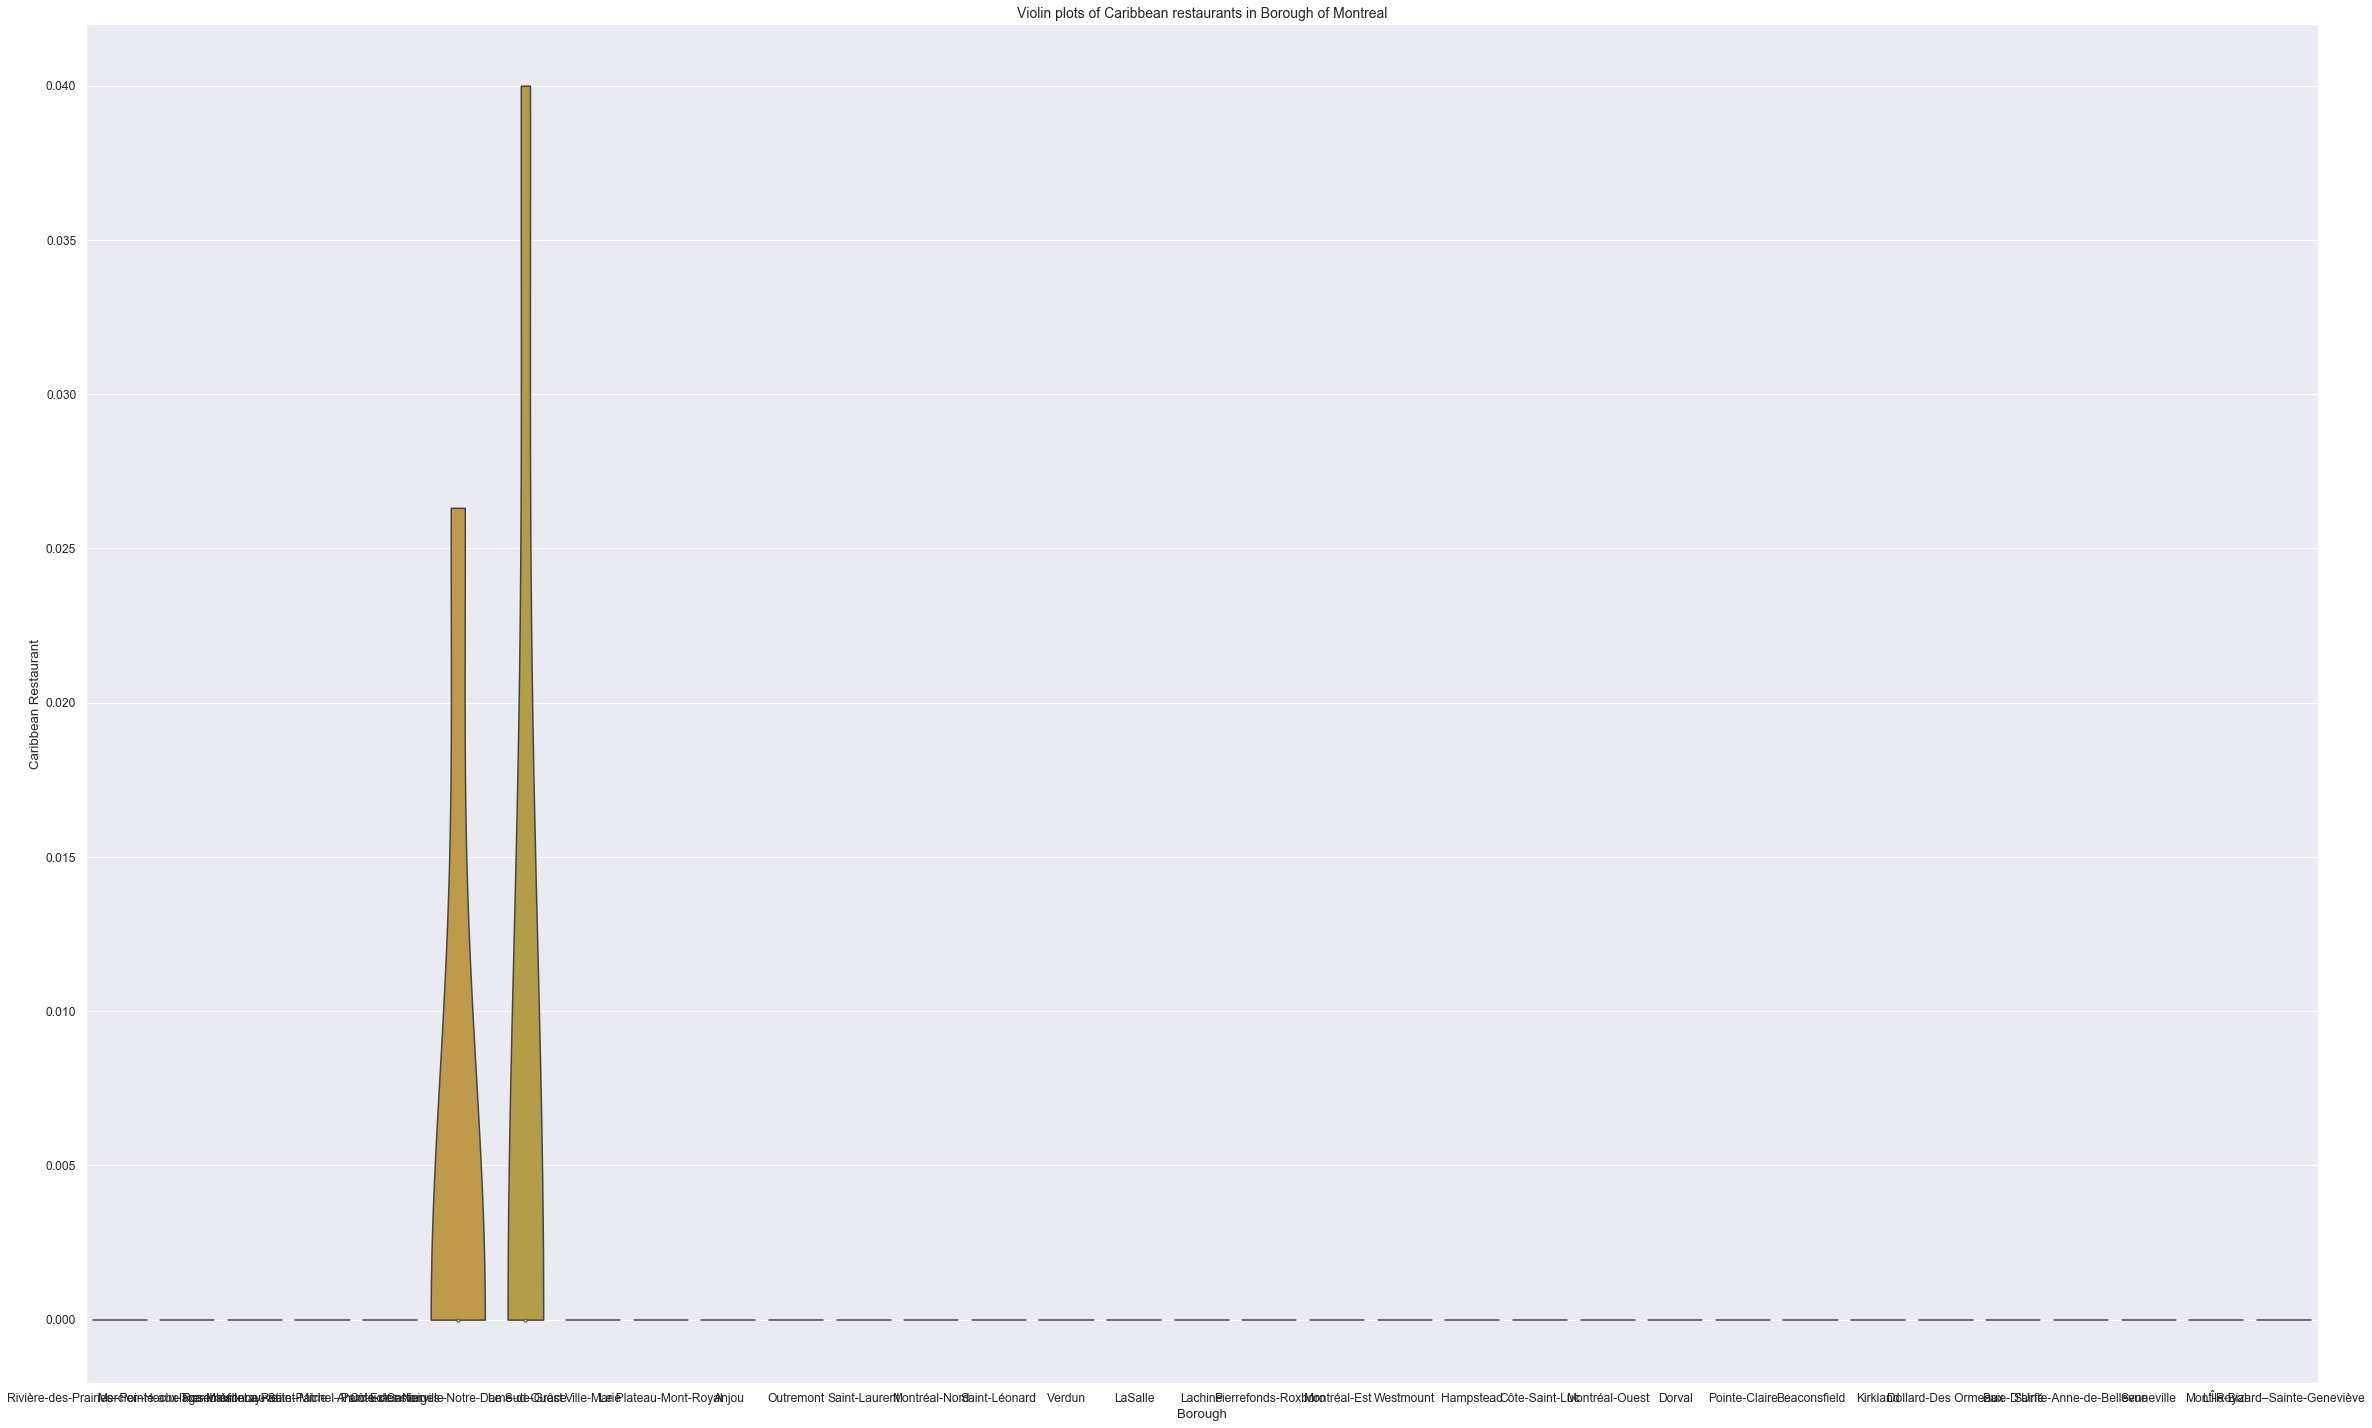

In [26]:
# Let's try Categorical plot 

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(40,25))

sns.set(font_scale=1.1)
sns.violinplot(y="Caribbean Restaurant", x="Borough", data=montreal_merged, cut=0);

plt.title('Violin plots of Caribbean restaurants in Borough of Montreal', fontsize=14)
plt.show()

With this plot we can identify the boroughs with densely populated Caribbean restaurants. However, we can notice at first glance that there is not really a high density. 

In this step, we visualize the neighborhood with Caribbean Restaurants

In [27]:
graph = pd.DataFrame(montreal_onehot.groupby('Neighborhood')['Caribbean Restaurant'].sum())
graph

,Caribbean Restaurant
Neighborhood,
Anjou,0
Baie-D'Urfé,0
Beaconsfield,0
Beaurivage,0
Bois-Francs,0
...,...
Vieux-Montréal,0
Vieux-Rosemont,0
Ville-Émard,0


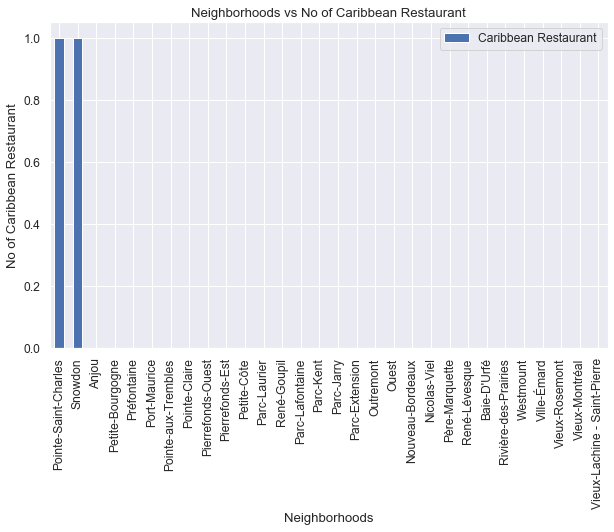

In [28]:
graph = pd.DataFrame(montreal_onehot.groupby('Neighborhood')['Caribbean Restaurant'].sum())
graph = graph.sort_values(by ='Caribbean Restaurant', ascending=False)
graph.iloc[:30].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Caribbean Restaurant")
plt.title("Neighborhoods vs No of Caribbean Restaurant")
plt.show()


<h3>3.3 Relationship between neighborhood and Haitian population </h3>

In [29]:
pop_hai

,Immigrant population according to certain birthplaces,Immigrants according to certain birthplaces,Haiti,% of immigrants from Haiti,Algeria,% of immigrants from Algeria,Italy,% of immigrants from Italy,France,% of immigrants from France,...,China,% of immigrants from China,Philipines,% of immigrants from Philipines,Lebanon,% of immigrants from Lebanon,Vietnam,% of immigrants from Vietnam,Romania,% of immigrants from Romania
0,Ahuntsic-Cartierville,51945,4310,0.0829724,4850,0.093368,3215,0.0618924,1820,0.0350371,...,1115,0.021465,255,0.00490904,3375,0.0649726,1340,0.0257965,1005,0.0193474
1,Anjou,13955,2470,0.176997,2890,0.207094,905,0.0648513,385,0.0275887,...,270,0.0193479,25,0.00179147,195,0.0139735,460,0.0329631,440,0.0315299
2,Côte-des-Neiges–Notre-Dame-de-Grâce,76220,1645,0.0215823,2130,0.0279454,1360,0.0178431,4155,0.0545133,...,4185,0.0549068,11445,0.150157,1225,0.0160719,1745,0.0228943,2780,0.0364734
3,Lachine,9580,265,0.0276618,255,0.026618,290,0.0302714,460,0.0480167,...,925,0.0965553,525,0.0548017,110,0.0114823,50,0.00521921,330,0.0344468
4,LaSalle,26940,440,0.0163326,1365,0.0506682,2500,0.0927988,405,0.0150334,...,2180,0.0809206,465,0.0172606,130,0.00482554,320,0.0118782,605,0.0224573
5,Le Plateau-Mont-Royal,24320,370,0.0152138,620,0.0254934,365,0.0150082,6730,0.276727,...,960,0.0394737,125,0.0051398,435,0.0178865,420,0.0172697,270,0.011102
6,Le Sud-Ouest,19185,365,0.0190253,790,0.041178,925,0.0482148,1570,0.0818348,...,2040,0.106333,290,0.015116,350,0.0182434,405,0.0211102,300,0.0156372
7,L'Île-Bizard–Sainte-Geneviève,4480,230,0.0513393,85,0.0189732,225,0.0502232,235,0.0524554,...,230,0.0513393,230,0.0513393,220,0.0491071,35,0.0078125,210,0.046875
8,Mercier–Hochelaga-Maisonneuve,27615,2400,0.0869093,3115,0.112801,1250,0.0452653,2660,0.0963245,...,1180,0.0427304,105,0.00380228,270,0.00977729,1170,0.0423683,510,0.0184682
9,Montréal-Nord,34005,11360,0.334069,3535,0.103955,3490,0.102632,465,0.0136745,...,240,0.00705779,80,0.0023526,1160,0.0341126,780,0.0229378,190,0.00558741


In [30]:
# get the Haitian population in Montreal
montreal_hai = pop_hai.loc[:,['Immigrant population according to certain birthplaces','Haiti']]
montreal_hai

,Immigrant population according to certain birthplaces,Haiti
0,Ahuntsic-Cartierville,4310
1,Anjou,2470
2,Côte-des-Neiges–Notre-Dame-de-Grâce,1645
3,Lachine,265
4,LaSalle,440
5,Le Plateau-Mont-Royal,370
6,Le Sud-Ouest,365
7,L'Île-Bizard–Sainte-Geneviève,230
8,Mercier–Hochelaga-Maisonneuve,2400
9,Montréal-Nord,11360


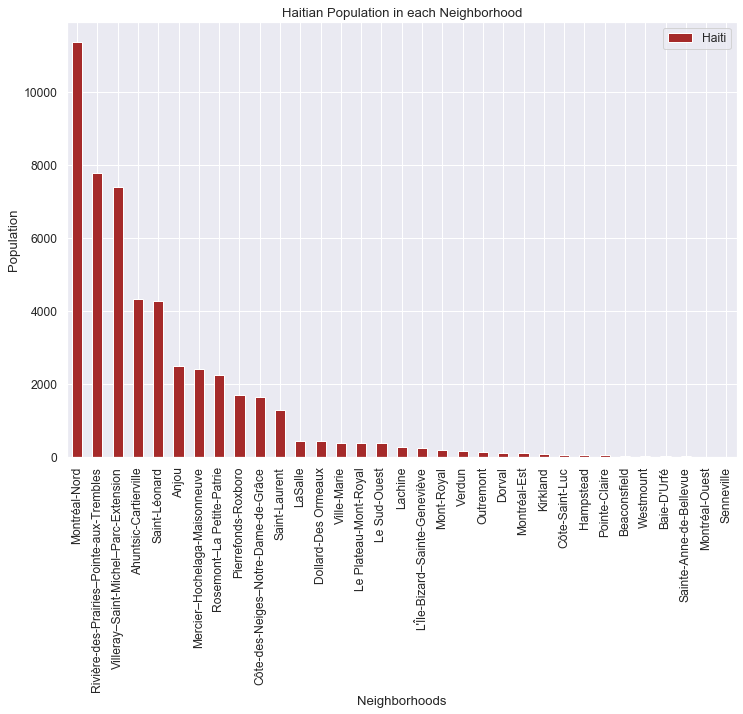

In [31]:
# Plot the distribution
bar_graph = montreal_hai.sort_values(by='Haiti', ascending=False)
bar_graph.plot(kind='bar',x='Immigrant population according to certain birthplaces', y='Haiti',figsize=(12,8), color='brown')
plt.title("Haitian Population in each Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

### 3.4 Relationship between Haitian population and Carribean restaurant

With only 2 restaurants in 2 boroughs, we cannot establish a meaningful relationship between the Haitian population and the number of Caribbean restaurants in Montreal. However, we can look in which borough where the population is much denser to place a Caribbean restaurant. This will be a certain guarantee for the good start and performance of the restaurant.

In [32]:
# Extract Neighborhoods and Caribbean restaurants
montreal_res = montreal_grouped[['Neighborhood', 'Caribbean Restaurant']]

montreal_res 

,Neighborhood,Caribbean Restaurant
0,Anjou,0.0
1,Baie-D'Urfé,0.0
2,Beaconsfield,0.0
3,Beaurivage,0.0
4,Bois-Francs,0.0
...,...,...
81,Vieux-Montréal,0.0
82,Vieux-Rosemont,0.0
83,Ville-Émard,0.0
84,Westmount,0.0


Finally we merge the dataframes to get the geospatial coordinates of the existed Caribbean restaurant in the neighborhoods

In [33]:
# merging the dataframes
montreal_merged = pd.merge(df_merged, montreal_res, on='Neighborhood')
montreal_merged

,Neighborhood,Borough,nom_mun,Latitude,Longitude,Caribbean Restaurant
0,Rivière-des-Prairies,Rivière-des-Prairies–Pointe-aux-Trembles,Montréal,45.667964,-73.536857,0.0
1,Beaurivage,Mercier–Hochelaga-Maisonneuve,Montréal,45.598013,-73.513942,0.0
2,Tétreaultville,Mercier–Hochelaga-Maisonneuve,Montréal,45.601646,-73.524579,0.0
3,Dupéré,Mercier–Hochelaga-Maisonneuve,Montréal,45.604441,-73.533697,0.0
4,Guybourg,Mercier–Hochelaga-Maisonneuve,Montréal,45.573289,-73.521329,0.0
...,...,...,...,...,...,...
81,Pierrefonds-Est,Pierrefonds-Roxboro,Montréal,45.509094,-73.809116,0.0
82,L'Île-Bizard–Sainte-Geneviève,L'Île-Bizard–Sainte-Geneviève,Montréal,45.495042,-73.903445,0.0
83,Vieux-Lachine - Saint-Pierre,Lachine,Montréal,45.445833,-73.650000,0.0
84,Ouest,Montréal-Nord,Montréal,45.587017,-73.643001,0.0


After performing the data cleaning & data analysis we can identify that their no big relationship established in terms of the Caribbean population & the popular Caribbean restaurants.

Thus this marks end of the data cleaning & analyses step in this project. Next we will look into the predictive modeling. In the predictive modelling we are going to use Clustering techniques since this is analysis of unlabeled data. K-Means clustering is used to perform the analysis of the data at hand. 

## 4. Predictive Modeling

### 4.1. Clustering Neighborhoods of Montreal

First step in K-means clustering is to identify best K value meaning the number of clusters in a given dataset. We use in this case the <i>''montreal_res''</i> containing the Montreal dataset with Caribbean restaurant percentage. The Elbow method will be use to do so. 

C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:11: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:11: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:11: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:11: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  # This is added 

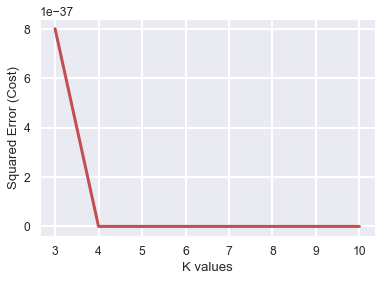

In [34]:
from sklearn.cluster import KMeans

montreal_res_clustering = montreal_res.drop('Neighborhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(montreal_res_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

After analysing using elbow method using distortion score & Squared error for each K value, looks like K = 4 is the best value.

Clustering the Montreal Neighborhood Using K-Means with K = 4

In [35]:
kclusters = 4

#montreal_res_clustering = montreal_res.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(montreal_res_clustering)

kmeans.labels_

C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [36]:
montreal_res.insert(0, 'Cluster Labels', kmeans.labels_)
montreal_merged = df_merged
montreal_res
# merge montreal_grouped with montreal_res to add latitude/longitude for each neighborhood
montreal_merged = montreal_merged.join(montreal_res.set_index('Neighborhood'), on='Neighborhood')
montreal_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
montreal_merged.reset_index(drop=True, inplace=True)
montreal_merged['Cluster Labels'].astype(int)
montreal_merged.head()

,Neighborhood,Borough,nom_mun,Latitude,Longitude,Cluster Labels,Caribbean Restaurant
0,Rivière-des-Prairies,Rivière-des-Prairies–Pointe-aux-Trembles,Montréal,45.667964,-73.536857,3.0,0.0
1,Beaurivage,Mercier–Hochelaga-Maisonneuve,Montréal,45.598013,-73.513942,3.0,0.0
2,Tétreaultville,Mercier–Hochelaga-Maisonneuve,Montréal,45.601646,-73.524579,3.0,0.0
3,Dupéré,Mercier–Hochelaga-Maisonneuve,Montréal,45.604441,-73.533697,3.0,0.0
4,Guybourg,Mercier–Hochelaga-Maisonneuve,Montréal,45.573289,-73.521329,3.0,0.0


Let us see the clusters visually on the map with the help of Folium.

In [44]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(montreal_merged['Latitude'], montreal_merged['Longitude'], montreal_merged['Neighborhood'], montreal_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

We have 4 clusters such as 0,1,2,3. Let us examine one after the other.

Cluster 0 has no rows meaning no data points or neighborhood was near to this centroid.

In [38]:
#Cluster 0
montreal_merged.loc[montreal_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,nom_mun,Latitude,Longitude,Cluster Labels,Caribbean Restaurant


Cluster 1 contains the neighborhoods which is more populated with Caribbean restaurants. It is show in purple in the map.

In [39]:
#Cluster 1
montreal_merged.loc[montreal_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,nom_mun,Latitude,Longitude,Cluster Labels,Caribbean Restaurant
20,Pointe-Saint-Charles,Le Sud-Ouest,Montréal,45.480093,-73.564176,1.0,0.04


Cluster 2 contains the neighborhoods which is sparsely populated with Caribbean restaurants. It is show in blue in the map.

In [40]:
#Cluster 2
montreal_merged.loc[montreal_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,nom_mun,Latitude,Longitude,Cluster Labels,Caribbean Restaurant
15,Snowdon,Côte-des-Neiges–Notre-Dame-de-Grâce,Montréal,45.485985,-73.630149,2.0,0.026316


Cluster 3 contains all the neighborhoods which has least number of Caribbean restaurants. It is shown in yellow color in the map

In [41]:
#Cluster 3
montreal_merged.loc[montreal_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,nom_mun,Latitude,Longitude,Cluster Labels,Caribbean Restaurant
0,Rivière-des-Prairies,Rivière-des-Prairies–Pointe-aux-Trembles,Montréal,45.667964,-73.536857,3.0,0.0
1,Beaurivage,Mercier–Hochelaga-Maisonneuve,Montréal,45.598013,-73.513942,3.0,0.0
2,Tétreaultville,Mercier–Hochelaga-Maisonneuve,Montréal,45.601646,-73.524579,3.0,0.0
3,Dupéré,Mercier–Hochelaga-Maisonneuve,Montréal,45.604441,-73.533697,3.0,0.0
4,Guybourg,Mercier–Hochelaga-Maisonneuve,Montréal,45.573289,-73.521329,3.0,0.0
...,...,...,...,...,...,...,...
81,Pierrefonds-Est,Pierrefonds-Roxboro,Montréal,45.509094,-73.809116,3.0,0.0
82,L'Île-Bizard–Sainte-Geneviève,L'Île-Bizard–Sainte-Geneviève,Montréal,45.495042,-73.903445,3.0,0.0
83,Vieux-Lachine - Saint-Pierre,Lachine,Montréal,45.445833,-73.650000,3.0,0.0
84,Ouest,Montréal-Nord,Montréal,45.587017,-73.643001,3.0,0.0


## 5. Results and Discussion

### 5.1. Results

This section presents the results of our work. Our approach consists in analyzing the best possibility of implementing a Caribbean restaurant in Montreal. To do so, we have documented geospatial data of the reference (residential) neighbourhoods of Montreal and their population size, to finally arrive at the neighbourhood that would be the most appropriate to open a Caribbean restaurant. By using Statistics Montreal data for the geospatial coordinates of the neighbourhoods and their respective populations, as well as the Foursquare API tool for the analysis of our data, we found the following results: 


<li>Among the the 33 boroughs or cities linked to Montreal, only Côte-des-Neiges-Notre-Dame-de-Grâce and Le Sud-Ouest have one or two Caribbean restaurants.</li>

<li>Boroughs such as Montréal-Nord, Rivière-des-Prairies-Pointe-aux-Trembles, Villeray-Saint-Michel-Parc-Extension, Ahuntsic-Cartierville and Saint-Léonard are the most populous in terms of the number of Haitian immigrants.</li>

<li>With the help of clusters examing & violin plots looks like Côte-des-Neiges–Notre-Dame-de-Grâce and Le Sud-Ouest are already densely populated with Caribbean restaurants. So it is better idea to leave those boroughs out and consider only Rivière-des-Prairies–Pointe-aux-Trembles, Montréal-Nord, Villeray–Saint-Michel–Parc-Extension, Ahuntsic-Cartierville and Saint-Léonard for the new restaurant's location.</li>

<li>After careful consideration it is a good idea to open a new Caribbean restaurant in <i><b>Montreal-Nord</b></i> borough since it has high number of Caribbean population which gives a higher number of customers possibility and lower competition since very less Caribbean restaurants in the neighborhoods.</li>

### 5.2. Discussion

The results obtained allow us to consider the Montreal-Nord borough as being the least competitive with the largest community of Haitian immigrants and among the boroughs with the fewest Caribbean restaurants. In addition, the distribution of the population gives the impression of a high density of Caribbean population, particularly Haitian, which favours the new restaurant by offering great opportunities for customers to visit. It is therefore certain that this region could be a perfect place to open a quality Caribbean or Haitian restaurant. 
However, our work meets certain limits. First of all with the clustering which is based solely on data obtained by Foursquare API. In addition, the distribution of the Haitian immigrant population in each neighbourhood or district is also based on the 2016 census, which is not up to date. Thus, the population distribution would certainly have changed by 2020, given the four-year lag in the data. Given that the distribution of the haitian population in each neighbourhood and the number of haitian restaurants are the main elements of this analysis and that the data is not entirely up to date, this analysis is not far from conclusive and can be improved in many areas. However, it certainly provides us with good insights, preliminary information on possibilities and a head start on this business problem by setting the right milestones. In addition, it can also potentially vary depending on the type of aggregation techniques we use to examine the data.


## 6. Conclusion

This project gave us the opportunity to work on a project with real data like a real data scientist. Such work required the use of different tools such as python libraries for data retrieval, manipulation, visualization and analysis. Matplotlib and seaborn were also very useful for visualization as well. For the prediction of the result of the data, we used a machine learning technique, reinforced by Folium for visualization on a map. Although there are some limitations inherent in our work that lead us to believe that our analysis can be further improved, we still believe that they have not undermined the quality of our work and that it will prove to be very useful. Thus, this project can be used for different purposes or scenarios such as the opening of a football club for example. Furthermore, this project is only the introduction of a young Data scientist into the immense universe of Data science, we hope that it can serve as a guide for dealing with other realities involving Data science.